In [ ]:
!pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [1]:
pip install tensorflow


In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2.18.0
True


In [3]:
## Import some basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset=pd.read_csv("/content/Churn_Modelling.csv")

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
### divide dependent and independent

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
#### feature engineering

Geography=pd.get_dummies(X["Geography"],drop_first=True, dtype=int)


In [9]:

pd.get_dummies(X["Geography"])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [10]:
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [11]:
Gender=pd.get_dummies(X["Gender"],drop_first=True, dtype=int)

In [12]:
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [13]:
#### concatenate these variables with dataframe

X.drop(["Geography","Gender"],axis=1,inplace=True)

In [14]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [15]:
x=pd.concat([X,Geography,Gender],axis=1)

In [16]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [17]:
### splitting the dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


# When We talk about ANN Feature Scalling is important


**For which all algorithms feature scalling is required**

-->> ANN, LR, KNN, K MEANS(distance base algo need feature scalling)

In [18]:
### Feature scalling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [19]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [20]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [21]:
X_test.shape

(2000, 8)

In [22]:
X_train.shape

(8000, 8)

**Part 2**

# Create The ANN



In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [24]:
#### lets initialize Ann
classifier=Sequential()

In [25]:
### Adding the input layer

classifier.add(Dense(units=8, activation='relu'))


In [47]:
### Adding the first hidden layer

classifier.add(Dense(units=5, activation='relu'))
classifier.add(Dropout(0.3))

In [48]:
### Adding second hidden layer

classifier.add(Dense(units=3, activation='relu'))

In [49]:
### Adding the output layer

classifier.add(Dense(1,activation='sigmoid'))

In [50]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
#classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.01)


In [53]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 10)

Epoch 1/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7779 - loss: 0.6564 - val_accuracy: 0.8122 - val_loss: 0.5742
Epoch 2/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8452 - loss: 0.5426 - val_accuracy: 0.8448 - val_loss: 0.4918
Epoch 3/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8504 - loss: 0.4715 - val_accuracy: 0.8451 - val_loss: 0.4481
Epoch 4/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8525 - loss: 0.4312 - val_accuracy: 0.8440 - val_loss: 0.4255
Epoch 5/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8500 - loss: 0.4158 - val_accuracy: 0.8466 - val_loss: 0.4105
Epoch 6/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8474 - loss: 0.4083 - val_accuracy: 0.8440 - val_loss: 0.4058
Epoch 7/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8507 - loss: 0.3897 - val_accuracy: 0.8440 - val_loss: 0.3962
Epoch 8/10
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8617 - loss: 0.3735 - val_accuracy: 0.

In [54]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [55]:
###### Early Stopping -----ACCURACY NOT INCREASING AUTOMATICALLY MODEL STOPS THE TRAINING
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [56]:
early_stopping

In [57]:
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100, callbacks=[early_stopping])

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8461 - loss: 0.3863 - val_accuracy: 0.8455 - val_loss: 0.3886
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8570 - loss: 0.3652 - val_accuracy: 0.8459 - val_loss: 0.3863
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8552 - loss: 0.3774 - val_accuracy: 0.8474 - val_loss: 0.3877


In [58]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

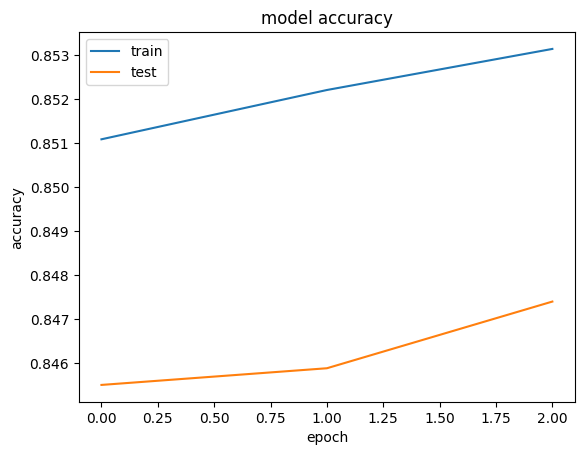

In [59]:
### summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

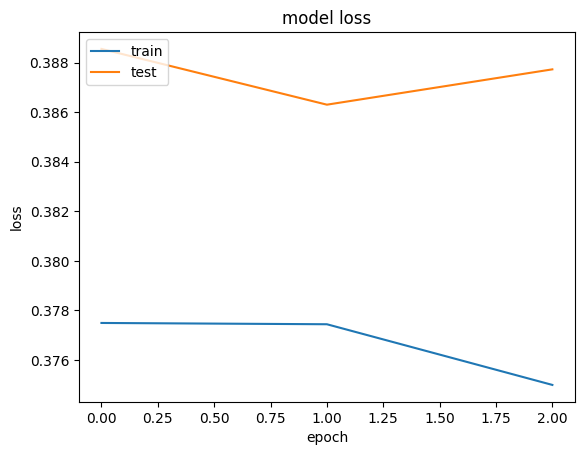

In [60]:
### Summarize the history for the loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the prediction and evaluating the model


In [61]:
# Predicting the testset result

y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [62]:
## Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1554,   41],
       [ 231,  174]])

In [63]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.864

In [64]:
### get the weights
classifier.get_weights()

[array([[-2.7208988e-02, -1.8960170e-02,  1.1034194e-02,  1.3078719e-01,
         -1.4400120e-01, -5.1595815e-02,  9.6414447e-02,  1.5325301e-02],
        [ 1.6299473e-01, -6.0508060e-01,  6.9293272e-01, -8.1574273e-01,
         -1.6181841e-01, -2.0744729e-01, -1.0752505e+00, -6.5700972e-01],
        [ 1.5568860e-02,  1.5569873e-01, -2.8775029e-03,  2.7291027e-01,
         -2.0572194e-01, -5.9667286e-02, -4.0653996e-02, -1.7150868e-01],
        [ 5.1098406e-01, -2.7303064e-01,  1.5511748e-01,  3.5716552e-01,
          2.1756800e-01, -2.7223039e-01,  1.0338542e-01, -2.1216835e-01],
        [ 1.0397098e+00,  2.9083738e-01,  7.8084528e-01, -5.4031360e-01,
         -1.4600727e-01,  1.3815787e+00, -3.8673061e-01,  5.3308129e-01],
        [ 3.5407886e-02, -2.7610087e-01,  1.4345130e-01, -3.6016766e-02,
         -8.0069497e-02,  1.0345215e-02,  4.4130567e-02,  1.6071300e-01],
        [-5.2874569e-02,  4.5716825e-01,  1.0335169e+00, -3.6692107e-01,
          5.3018719e-01, -5.1868594e-01,  1.7